In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data

In [3]:
STA = ['BDCO']

BDCO = 0

In [4]:
z = 0

In [5]:
os.chdir('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z])
os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
os.system('sac2xy 2 model.9.vs > model_9_vs.txt')
os.system('sac2xy 2 syn.9ur.disp > syn_9ur.txt')
os.system('sac2xy 2 urayl.sac > urayl.txt')

0

In [6]:
model_joint_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/model_0_vs.txt')
model_joint_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/model_9_vs.txt')


In [7]:
vs_1 = []
prof_1 = []
for i,j in enumerate(model_joint_1):
    vs_1.append(j[0])
    prof_1.append((-1)*(j[1]))

vs_0_1 = []
prof_0_1 = []
for i,j in enumerate(model_joint_0_1):
    vs_0_1.append(j[0])
    prof_0_1.append((-1)*(j[1]))
    

In [8]:
RF_0_1 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/*a=1.0.eqr')
RF_0_25 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/*a=2.5.eqr')

RF_1 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/syn.9.rftn')

In [9]:
group_ray_periods_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/urayl.txt')[:,0]
group_ray_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/urayl.txt')[:,1]

group_ray_periods_1 =  np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/syn_9ur.txt')[:,0]
group_ray_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/syn_9ur.txt')[:,1]


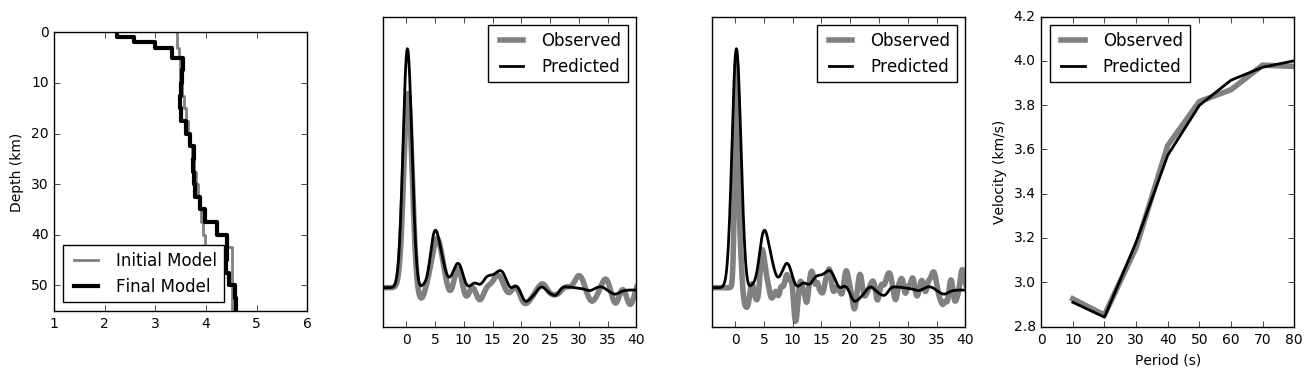

In [10]:
fig = plt.figure(figsize = (16,4),facecolor='white')

gs1 = gridspec.GridSpec(1,4)
gs1.update(wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs1[0])
ax1.step(vs_0_1,prof_0_1,'grey',lw= 2, where='post',label='Initial Model')
ax1.step(vs_1,prof_1,'k',lw= 3, where='post',label='Final Model')
ax1.set_ylabel('Depth (km)')
ax1.legend()
ax1.set_xlim([1,6])
ax1.set_ylim([55,0])
ax1.set_aspect(0.1)
ax1.legend(loc=3)

ax4 = plt.subplot(gs1[1])
ax4.plot(RF_0_1[0].times()-10,RF_0_1[0].data,'grey',lw=4,label='Observed')
ax4.plot(RF_1[0].times()-10,RF_1[0].data,'k',lw=2,label='Predicted')
ax4.set_xlim(-4,40)
ax4.set_yticks([])
ax4.legend(loc=0)


ax3 = plt.subplot(gs1[2])
ax3.plot(RF_0_25[0].times()-10,RF_0_25[0].data,'grey',lw=4,label='Observed')
ax3.plot(RF_1[0].times()-10,RF_1[0].data,'k',lw=2,label='Predicted')
ax3.set_xlim(-4,40)
ax3.set_yticks([])
ax3.legend(loc=0)

ax5 = plt.subplot(gs1[3])
ax5.plot(group_ray_periods_0_1,group_ray_0_1,'grey',lw=4,label='Observed')
ax5.plot(group_ray_periods_1,group_ray_1,'k',lw=2,label='Predicted')
ax5.set_xlabel('Period (s)')
ax5.set_ylabel('Velocity (km/s)')   
ax5.set_xlim(0,80)
ax5.legend(loc=0)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/'+STA[z]+'/joint_inversion.png')